# **O que são Redes Neurais?**

- **Inspiração nas Neurônios Humanos:**
  - A ideia de redes neurais foi proposta por Frank Rosenblatt em 1957, inspirada no funcionamento dos neurônios no cérebro humano.
  - A estrutura em camadas dos neurônios no cérebro humano envolve dendritos como sensores, axônios para transmitir sinais, e sinapses para a comunicação entre neurônios.

 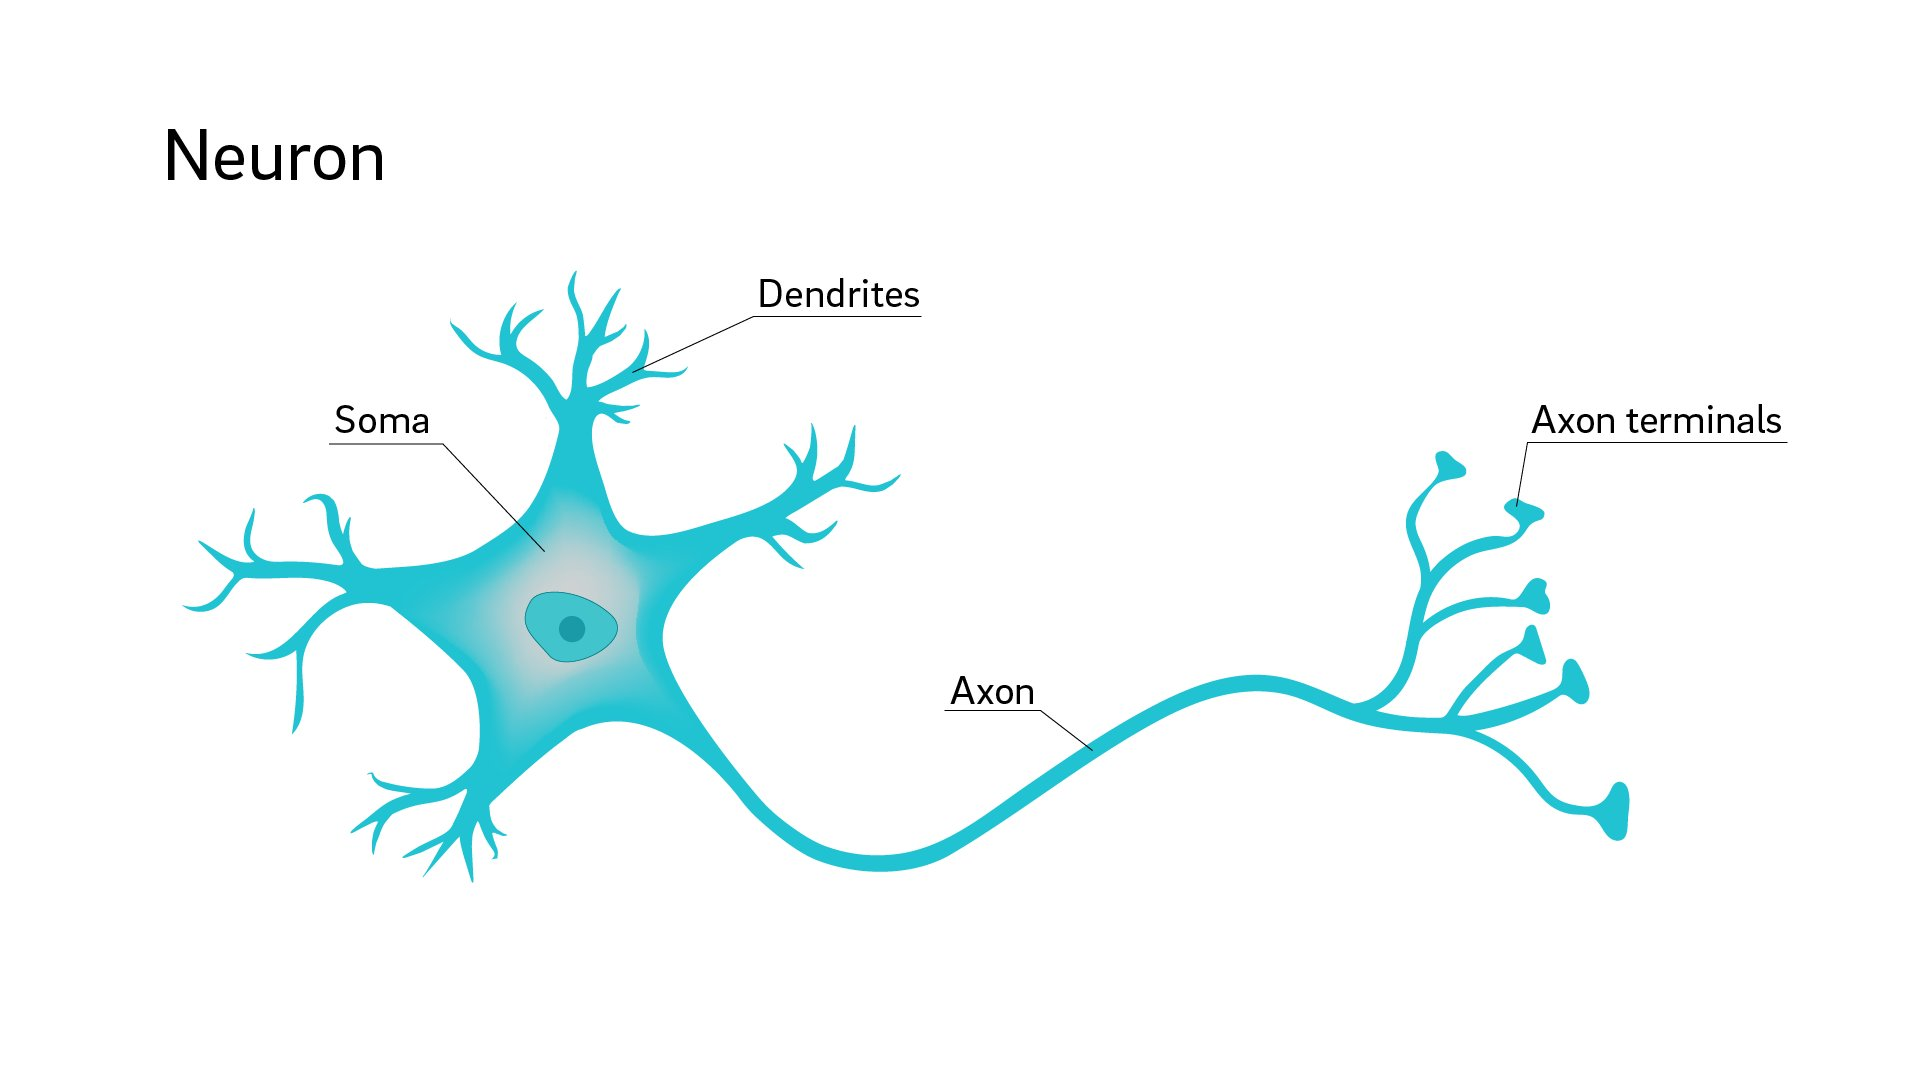

- **Arquitetura das Redes Neurais:**
  - As redes neurais, baseadas na arquitetura cerebral, utilizam camadas de neurônios interconectados para processar informações.
  - Assim como no cérebro humano, as redes neurais transmitem sinais entre camadas, permitindo a realização de ações específicas após o processamento da informação.

  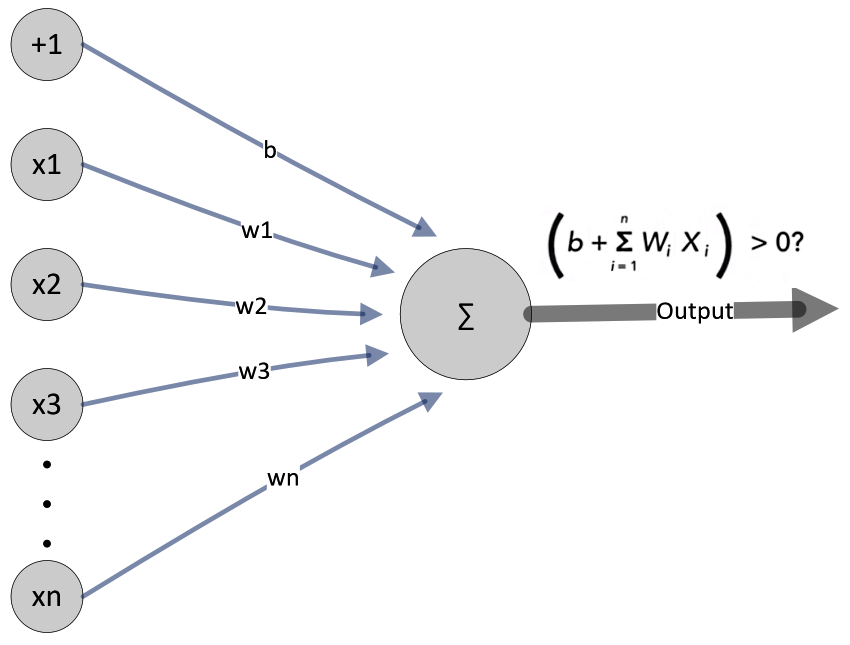

- **Limitações do Perceptron:**
  - O perceptron, uma rede neural simples sem camadas ocultas, mostrou sérias limitações em aprender lógica complexa.
  - Marvin Minsky e Seymour Papert, em 1969, concluíram que o perceptron não era capaz de aprender lógica complexa, incluindo funções simples como XOR.

- **Inverno da IA**
  - Essas limitações levaram a uma diminuição do interesse em machine learning e redes neurais, conhecida como o "AI winter" (inverno da IA).
  - A falta de capacidade de hardware contribuiu para o ceticismo em relação à IA, pois a computação necessária não estava disponível ou era muito cara.

- **Revitalização na Década de 1990:**
  - Avanços na computação distribuída no final da década de 1990 proporcionaram infraestrutura acessível, marcando o fim do "AI winter".
  - Isso reacendeu o interesse na pesquisa em IA, iniciando uma era conhecida como "AI spring" (primavera da IA).

- **Desenvolvimento do Multilayer Perceptron:**
  - Para lidar com problemas mais complexos, pesquisadores desenvolveram uma rede neural com várias camadas chamada de "multilayer perceptron" (MLP).
  - O MLP consiste em camadas de entrada, camadas ocultas e camada de saída, onde cada neurônio de uma camada está conectado a todos os neurônios da próxima camada.

- **Desafios de Interconexão:**
  - Em redes mais complexas, o número de interconexões entre neurônios aumenta significativamente, exigindo abordagens para reduzir essas interconexões sem comprometer a qualidade.

# **Como treinar uma rede neural?**

- **Camadas (Layers):**
  - As camadas são os blocos fundamentais de uma rede neural, atuando como módulos de processamento de dados.
  - Cada camada recebe inputs, processa-os e gera outputs relevantes para a questão de negócios em análise.

- **Função de Perda (Loss Function):**
  - A função de perda fornece o sinal de feedback usado nas iterações do processo de aprendizado.
  - Ela mede a discrepância entre a saída prevista e a saída desejada para um único exemplo.

- **Função de Custo (Cost Function):**
  - A função de custo é a função de perda aplicada a um conjunto completo de exemplos de treinamento.
  - Ela representa a média das perdas individuais em todo o conjunto de dados de treinamento.

- **Otimizador (Optimizer):**
  - O otimizador determina como o sinal de feedback da função de perda será interpretado.
  - Ele ajusta os pesos da rede para minimizar a função de custo durante o treinamento.

- **Dados de Entrada (Input Data):**
  - Os dados de entrada são usados para treinar a rede neural e especificam a variável-alvo.

- **Pesos (Weights):**
  - Os pesos são calculados durante o treinamento e representam a importância de cada entrada.
  - Ajustes nos pesos são realizados para minimizar a função de custo, refletindo a importância relativa das entradas.

- **Função de Ativação (Activation Function):**
  - Os valores são multiplicados por diferentes pesos e agregados, sendo interpretados pela função de ativação escolhida.
  - A função de ativação determina como os valores serão combinados e interpretados.

- **Treinamento da Rede Neural:**
  - Durante o treinamento, cada exemplo é processado, gerando uma saída prevista.
  - A diferença entre a saída esperada e a prevista é calculada como a perda para aquele exemplo.
  - O objetivo do treinamento é ajustar os pesos para minimizar o custo total, marcando a rede como treinada quando o mínimo é alcançado.

## **Funções de Ativação**

- **Passo Binário** ou *Binary-Step*
  - a função de ativação mais simples
  - pode ser utilizada na criação de um classificador binário
  
$$ f(x) = \left\{
  \begin{array}{ll}
    1 & \text{se } x \geq 0 \\
    0 & \text{se } x < 0
  \end{array}
\right.$$

  - como a derivada $f'(x) = 0$, sempre, então essa função de ativação não pode ser utilizada em *back-propagation*, pois ela vai impedir a atualização dos pesos

In [22]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# ignorar warnings
warnings.filterwarnings('ignore')

In [23]:
# gerar uma lista de valores entre -1 e 1
x = np.linspace(-10, 10, 200)

In [24]:
# criando uma função de ativação binary-step
def binary_step(x):
  if x >= 0:
    return 1
  else:
    return 0

In [25]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x]
}

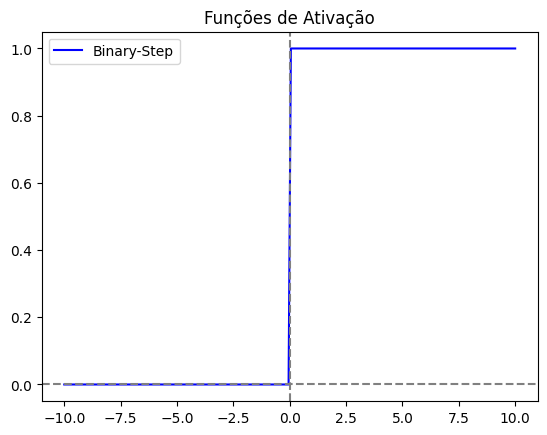

In [26]:
plt.plot(x, act_function['binary_step'], 'b-', label='Binary-Step')
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.show()

- **Linear**
  - a ativação é proporcional à entrada
  
$$ f(x) = ax$$

  - como a derivada $f'(x) = a$, sempre, então isso implica que a atualização dos pesos da rede será sempre a mesma
  - a rede também não vai conseguir aprender, visto que o gradiente de erro é o mesmo
  - ideal somente quando o problema a ser resolvido é muito simples -> acerto praticamente de primeira

In [27]:
# criando uma função de ativação linear
def linear(x, a):
  return a * x

In [28]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x]
}

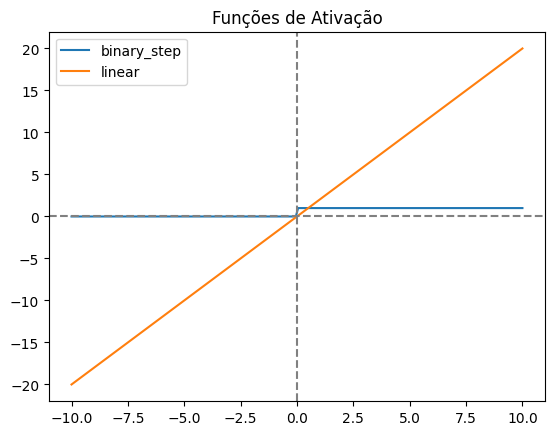

In [29]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.show()

- **Sigmóide**
  - a ativação é calculada pela função logística
  - muito utilizada para classificação (uma das mais utilizadas problemas de classificação)
  
$$ f(x) = \frac{1}{1+e^{-x}}$$

  - a derivada $f'(x)$ é contínua e suave, sendo mais significativa entre -3 e 3.
  - fora desse intervalo de entrada, teremos gradientes praticamente nulos (sem atualização de pesos) -> realizando a normalização das entradas
  - não é simétrica em relação a zero -> todas as saídas possuem o mesmo sinal

In [30]:
# criando uma função de ativação sigmoidal
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [31]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x]
}

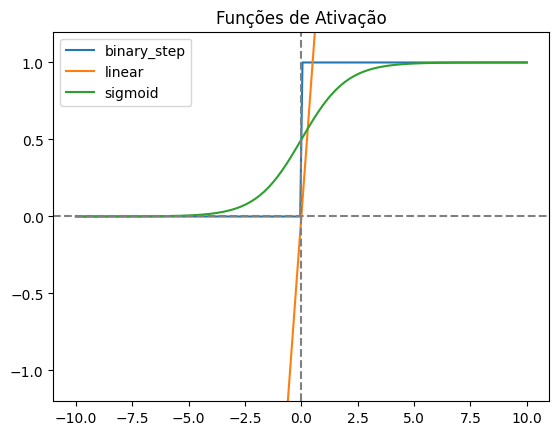

In [34]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.show()

- **Tangente Hiperbólica**
  - variação da função logística - simétrica em relação ao zero
  - muito utilizada para classificação
    
$$ f(x) = \frac{2}{1+e^{-2x}}-1$$

  - $f'(x)$ é contínua e suave, com valores diferentes de zero entre -3 e 3

In [35]:
# criando uma função de ativação tangente hiperbólica
def tanh(x):
  return 2 / (1 + np.exp(-2*x)) -1

In [36]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x],
    'tanh': [tanh(i) for i in x]
}

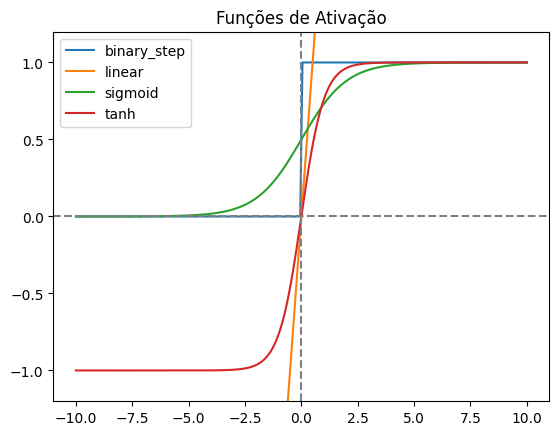

In [37]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.show()

- **ReLU - Rectified Linear Unit**
  
$$ f(x) = \max({0, x})$$

  - como os neurônios somente são ativados com inputs positivos, isso impede que todos os neurônios sejam ativados ao mesmo tempo.
  - torna o treinamento mais computacionalmente eficiente, permitindo um treinamento mais focado (neurônios mais especializados)
  - problema = gradiente nulo para $x<0$ -> causa o fenômeno *Vanishing Gradients*

In [38]:
# criando uma função de ativação relu
def relu(x):
  return max(0, x)

In [39]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x],
    'tanh': [tanh(i) for i in x],
    'relu': [relu(i) for i in x]
}

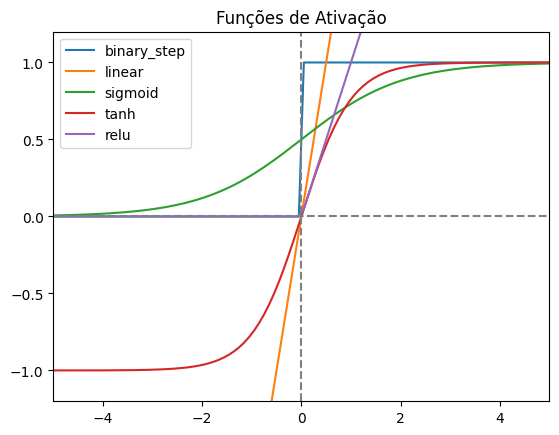

In [41]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.xlim([-5, 5])
plt.show()

- **Leaky-ReLU - Leaky Rectified Linear Unit**
  
$$ f(x) = \left\{
  \begin{array}{ll}
    x & \text{se } x \geq 0 \\
    ax & \text{se } x < 0
  \end{array}
\right.$$

  - - como os neurônios somente são ativados com inputs positivos, isso impede que todos os neurônios sejam ativados ao mesmo tempo.
  - torna o treinamento mais computacionalmente eficiente, permitindo um treinamento mais focado (neurônios mais especializados)
  - resolve o problema do gradiente nulo para $x<0$

In [43]:
# criando uma função de ativação leaky-relu
def leaky_relu(x, a):
  if x >= 0:
    return x
  else:
    return a * x

In [48]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x],
    'tanh': [tanh(i) for i in x],
    'relu': [relu(i) for i in x],
    'leaky_relu': [leaky_relu(i, a=0.05) for i in x]
}

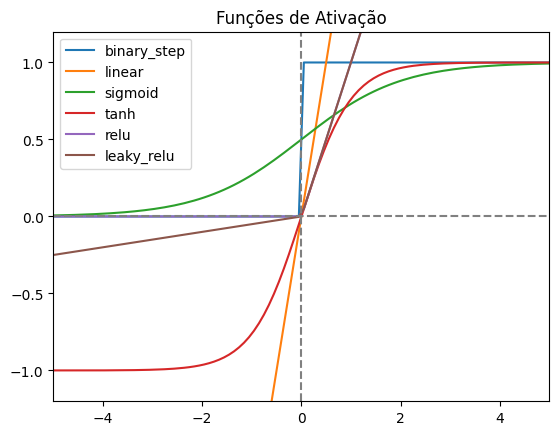

In [49]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.xlim([-5, 5])
plt.show()

- **ELU - Exponential Linear Unit**
  
$$ f(x) = \left\{
  \begin{array}{ll}
    x & \text{se } x \geq 0 \\
    a(e^{x}-1) & \text{se } x < 0
  \end{array}
\right.$$

  - como os neurônios somente são ativados com inputs positivos, isso impede que todos os neurônios sejam ativados ao mesmo tempo.
  - torna o treinamento mais computacionalmente eficiente, permitindo um treinamento mais focado (neurônios mais especializados)
  - a forma mais suave para valores negativos permite uma atualização mais controlada dos neurônios com entradas negativas
   

In [52]:
# criando uma função de ativação elu
def elu(x, a):
  if x >= 0:
    return x
  else:
    return a * (np.exp(x)-1)

In [54]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x],
    'tanh': [tanh(i) for i in x],
    'relu': [relu(i) for i in x],
    'leaky_relu': [leaky_relu(i, a=0.05) for i in x],
    'elu': [elu(i, a=0.05) for i in x]
}

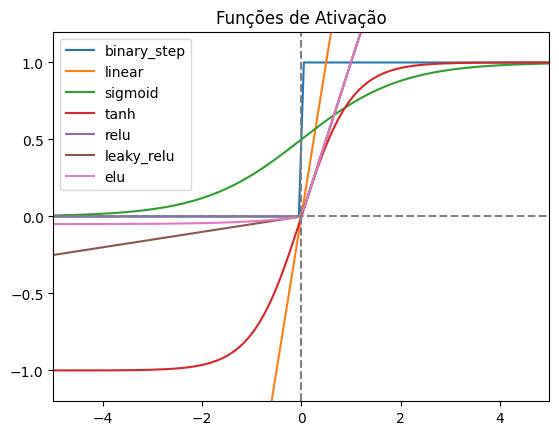

In [55]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.xlim([-5, 5])
plt.show()

- **Swish**
  
$$ f(x) = \frac{x}{1+e^{-x}}$$

  - como os neurônios somente são ativados com inputs positivos, isso impede que todos os neurônios sejam ativados ao mesmo tempo.
  - torna o treinamento mais computacionalmente eficiente, permitindo um treinamento mais focado (neurônios mais especializados)
  - mesma performance computacional que ReLU (e mesmos benefícios) porém os pesquisadores do Google mostraram que possui maior desempenho de previsão

In [56]:
# criando uma função de ativação swish
def swish(x):
  return x / (1 + np.exp(-x))

In [57]:
# calculando a função
act_function = {
    'binary_step' : [binary_step(i) for i in x],
    'linear' : [linear(i, a=2) for i in x],
    'sigmoid' : [sigmoid(i) for i in x],
    'tanh': [tanh(i) for i in x],
    'relu': [relu(i) for i in x],
    'leaky_relu': [leaky_relu(i, a=0.05) for i in x],
    'elu': [elu(i, a=0.05) for i in x],
    'swish': [swish(i) for i in x]
}

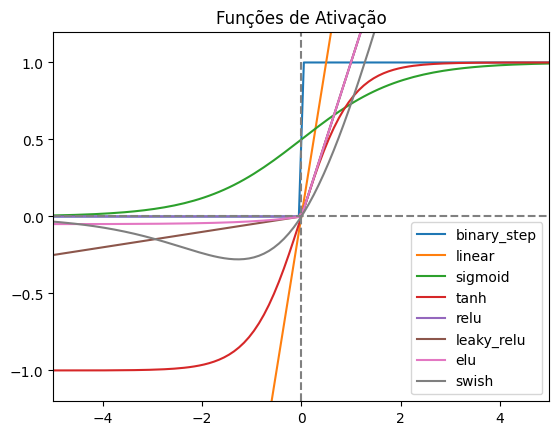

In [58]:
for function in act_function:
  plt.plot(x, act_function[function], label=function)
plt.legend(loc='best')
plt.title('Funções de Ativação')
plt.axhline(y=0, ls='--', color='gray')
plt.axvline(x=0, ls='--', color='gray')
plt.ylim([-1.2, 1.2])
plt.xlim([-5, 5])
plt.show()

- **Softmax**
  
$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$

  - função de ativação para camadas de saída de problemas de classificação multi-classe

In [59]:
# criando uma função de ativação softmax
def softmax(x):
  z = np.exp(x)
  return z / z.sum()

In [62]:
# suponha que meu neurônio de saída (classificador dos vinhos) tenha a seguinte input:
input = np.random.uniform(-3, 5, 8)
print(input)
print(softmax(input))

[ 1.19026197  0.08500649  2.22464828  4.70837656 -0.8709695   2.6524779
  4.12844692  1.02570772]
[0.01611917 0.00533748 0.04534935 0.54355127 0.00205192 0.06956248
 0.30435488 0.01367344]


# **Como escolher a função de ativação**

- essencialmente, função de ativação = hiperparâmetro
- funções sigmoides e tanh geralmente funcionam para classificação, apesar de poderer ocasionar o problema de *vanishing gradient*
- ReLU = caso mais geral e uma das mais utilizadas
- no caso de neurônios mortos = Leaky-ReLU
- ReLU apenas nas camadas intermediárias